<a href="https://colab.research.google.com/github/NEBTICS/Fresh_Or_Rotten_fruits_using_CNN/blob/master/Fresh_or_rotten_fruits_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##code to prevent colab from disconecting !!!


---



In [ ]:
#Use only when the training takes long time
"""

function ConnectButton(){
    console.log("Connect pushed"); 
    document.querySelector("#top-toolbar > colab-connect-button").shadowRoot.querySelector("#connect").click() 
}
setInterval(ConnectButton,60000);


Set a javascript interval to click on the connect button every 60 seconds.
Open developer-settings (in your web-browser) with Ctrl+Shift+I then click on console tab and type this on 
the console prompt. (for mac press Option+Command+I)
                                                           -Stack overflow
"""


## Downgrading tensorflow version from 2.3.0 to 2.2.0 
*  If your pc has 2.3.0 version install then skip  !!!
##* Note:-Its important so that the save model is compatible while deploying/testing on different machine! Colab uses a higher Version tensorflow which is not available till now for download 
                                        6-September-2020 

In [44]:
tf.__version__

'2.3.0'


In [ ]:
!pip install tensorflow==2.2.0

In [34]:
import tensorflow as tf
tf.__version__

'2.2.0'

## Instaling kiggle and downloading data set directly from kiggle via colab
 #skip to importing libraries if you already have a dataset or working with jupyter/spyder ide


In [ ]:
! pip install -q kaggle

After runing the first cell(! pip install -q kaggle) !
Download the kaggle.json file from the kaggle website
* Steps
1. Create a account at kaggle
2. go to --- My Account-----Scroll down-- you will     find  a option ----create a new api--click
3. jsone file will be downloaded file 

In [ ]:
from google.colab import files
files.upload()#upload from pc to colab and copy the path
#upload your json file

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"smithbarbose","key":"efd499fa06f6c2554fefc5408c46cac1"}'}

* making directoy and copying the json file to it

In [ ]:
!mkdir ~/.kaggle #make directory
!cp kaggle.json ~/.kaggle #copy to the directory

In [ ]:
 ! chmod 600 ~/.kaggle/kaggle.json #changing the permission

Downloading the data set

In [ ]:
  ! kaggle datasets download -d sriramr/fruits-fresh-and-rotten-for-classification 

100% 3.57G/3.58G [01:03<00:00, 68.1MB/s]
100% 3.58G/3.58G [01:03<00:00, 60.1MB/s]


Unziping the data set

In [ ]:
!unzip  fruits-fresh-and-rotten-for-classification.zip

## **Fresh_or_rotten_fruit_clasiffication** 
 #importing libraries

In [ ]:
import tensorflow as tf
import keras 
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
tf.__version__

'2.2.0'

Arranging the images #reshaping the flow

In [ ]:
#First we need to create the Image Augmantation
traning_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip='True')
test_datagen=ImageDataGenerator(rescale=1./255)

 * Importing the data set 
 * and spliting into training and test 

In [ ]:
#creating the test & train sets
traning_set=traning_datagen.flow_from_directory('/content/dataset/train',batch_size=60,target_size=(64,64),class_mode='categorical')
test_set=test_datagen.flow_from_directory('/content/dataset/test',batch_size=60,target_size=(64,64),class_mode='categorical')

Found 10901 images belonging to 6 classes.
Found 2698 images belonging to 6 classes.


* Building the convolution model 

In [ ]:
model=tf.keras.Sequential()
#first layer
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),input_shape=[64,64,3],activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2))
#second
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2))
#flatten
model.add(tf.keras.layers.Flatten())
#adding the nural net
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(units=1024,activation='relu'))
model.add(tf.keras.layers.Dense(units=521,activation='relu'))
model.add(tf.keras.layers.Dense(units=6,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 10816)             0

In [ ]:
#compling
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(x=traning_set,validation_data=test_set,epochs=10)


Epoch 1/10
182/182 [==============================] - 56s 309ms/step - loss: 0.2049 - accuracy: 0.7183 - val_loss: 0.1377 - val_accuracy: 0.8232
Epoch 2/10
182/182 [==============================] - 56s 306ms/step - loss: 0.1139 - accuracy: 0.8647 - val_loss: 0.0654 - val_accuracy: 0.9281
Epoch 3/10
182/182 [==============================] - 56s 307ms/step - loss: 0.0820 - accuracy: 0.9031 - val_loss: 0.1023 - val_accuracy: 0.8884
Epoch 4/10
182/182 [==============================] - 56s 306ms/step - loss: 0.0707 - accuracy: 0.9166 - val_loss: 0.0455 - val_accuracy: 0.9474
Epoch 5/10
182/182 [==============================] - 56s 306ms/step - loss: 0.0606 - accuracy: 0.9299 - val_loss: 0.0327 - val_accuracy: 0.9659
Epoch 6/10
182/182 [==============================] - 56s 310ms/step - loss: 0.0530 - accuracy: 0.9405 - val_loss: 0.0376 - val_accuracy: 0.9566
Epoch 7/10
182/182 [==============================] - 56s 306ms/step - loss: 0.0450 - accuracy: 0.9506 - val_loss: 0.0338 - val_ac

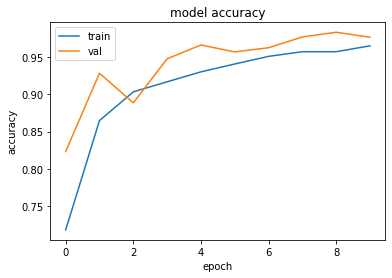

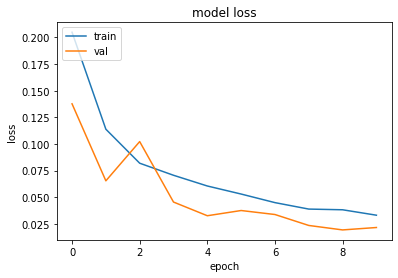

In [ ]:
#ploting the accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
#ploting the loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
#save your model and download it or add drive path 
model.save('Fresh_Rotten_fruis.h5')#saving the weights of nural network
model_json = model.to_json()       #Saving in json form
with open("Fresh_Rotten_Fruits.json", "w") as json_file:
    json_file.write(model_json)
print('Saved')

Saved


In [45]:
import numpy as np
from keras.preprocessing import image
np.loadtxt
classes = ['Fresh Apple','Fresh Banana','Fresh Orange','Rotten Apple','Rotten Banana','Rotten Orange']#creating the class labels
test_image = image.load_img('/content/apple.jpeg', target_size = (64, 64))#upload your image
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
print(np.argmax(result))
result1=result[0]
for i in range(6):
  if result1[i] == 1.:
    break;
prediction = classes[i]
print(prediction)    

0
Fresh Apple


##* Suggestion 
##If you are working on multiple classes(more then 20)  then use this syntax 

 

In [ ]:
#Saving in array #bypass 
import numpy as np
labels=traning_datagen.flow_from_directory('/content/dataset/train')
Demo_labels=labels.class_indices
print(Demo_labels)
print("Dict data is converted to array")
#converting dict to array
data = list(dict. items())
an_array = np. array(data)
print(an_array)
np.save('Fruits_labels',an_array)
#saving in array form 

In [ ]:
#prediction from array #bypass
label_data=np.load('/content/Fruits_labels.npy')
test_image = image.load_img('/content/272782_1100.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
result1=result[0]
for i in range(6):
  if result1[i] == 1.:
    break;
prediction = label_data[i][0]
print(prediction)  

##**Regards Neb.tics**